Linear Regression - Actual vs Predicted:
Actual: 167.82, Predicted: 171.19
Actual: 160.95, Predicted: 162.47
Actual: 156.80, Predicted: 161.29
Actual: 157.67, Predicted: 161.59
Actual: 150.23, Predicted: 154.95


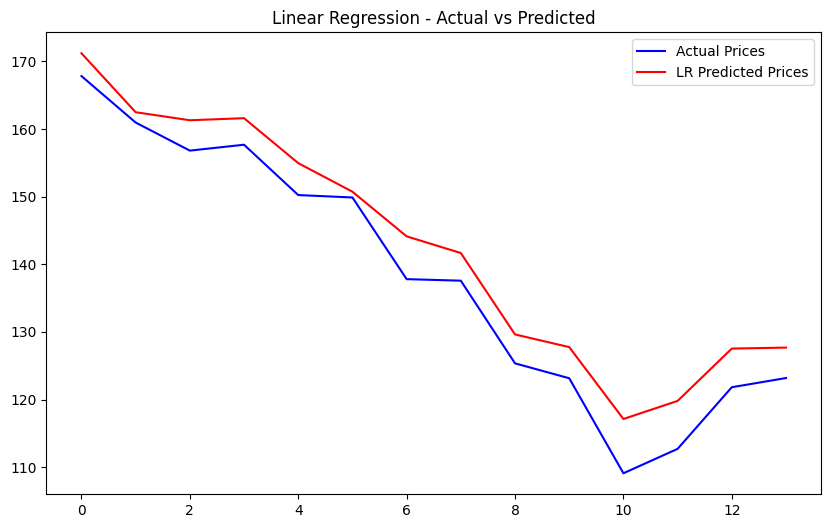

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('TSLA_historical_data.csv')  # Update with your file path
df['t'] = pd.to_datetime(df['t'])
df = df.sort_values('t')

# Extract features and target variable
X = df[['o', 'h', 'l', 'v']].values
y = df['c'].values.reshape(-1, 1)

# Scaling the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# Initialize and Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Calculate errors (MSE and MAE)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Inverse transform predictions
actual_lr = scaler_y.inverse_transform(y_test)[:5]
predicted_lr = scaler_y.inverse_transform(y_pred_lr)[:5]

# Print first 5 values for Linear Regression
print("Linear Regression - Actual vs Predicted:")
for i in range(5):
    print(f"Actual: {actual_lr[i][0]:.2f}, Predicted: {predicted_lr[i][0]:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(scaler_y.inverse_transform(y_test), label='Actual Prices', color='blue')
plt.plot(scaler_y.inverse_transform(y_pred_lr), label='LR Predicted Prices', color='red')
plt.title('Linear Regression - Actual vs Predicted')
plt.legend()
plt.show()


In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 9.9 MB/s eta 0:00:00


Data Sample:
                     t           v        vw       o       c       h       l  \
0  2022-09-22 04:00:00  70531910.0  291.5978  299.86  288.59  301.29  285.82   
1  2022-09-23 04:00:00  63702162.0  276.6500  283.09  275.33  284.50  272.82   
2  2022-09-26 04:00:00  57846913.0  278.2332  271.83  276.01  284.09  270.31   
3  2022-09-27 04:00:00  61925185.0  283.4808  283.84  282.94  288.67  277.51   
4  2022-09-28 04:00:00  54642017.0  283.4179  283.08  287.81  289.00  277.57   

         n  
0  1086009  
1  1057060  
2   909215  
3   857133  
4   739947  
The time complexity is: 0.061702728271484375
First 5 Actual Prices: [222.415 275.33  194.7   268.21  173.44 ]
First 5 Predicted Prices: [210.62559235 265.32270048 179.29281313 271.29104951 174.13350532]


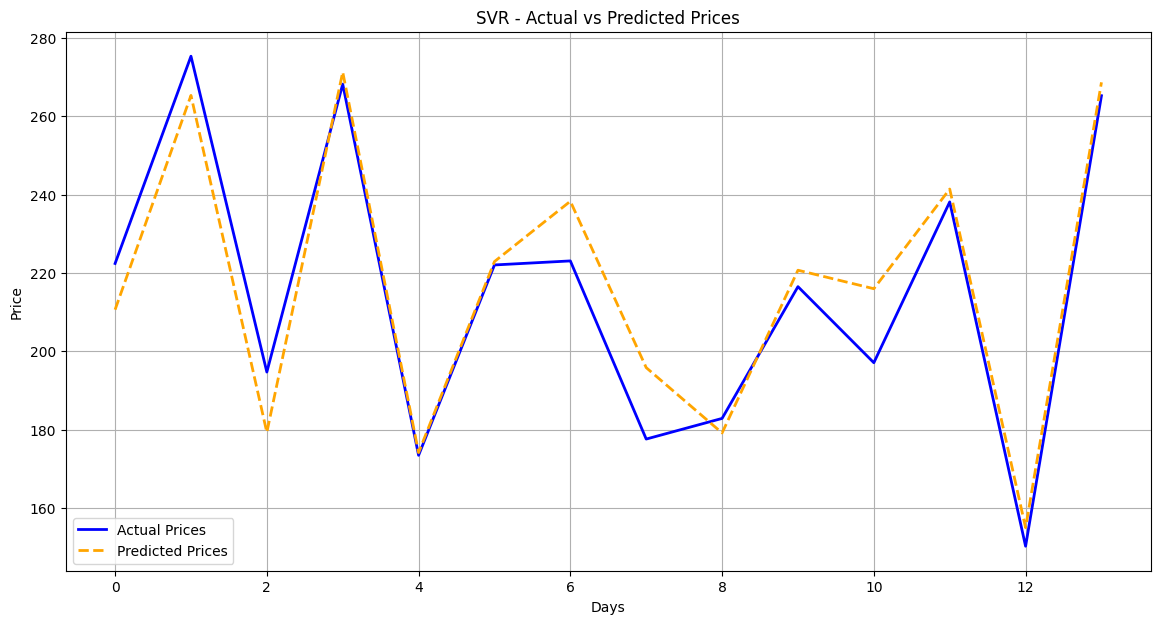

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as t
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load TSLA historical data
df = pd.read_csv('TSLA_historical_data.csv')

# Display the first few rows of the dataframe
print("Data Sample:")
print(df.head())

# Create target variable (next day's close price)
df['Target'] = df['c'].shift(-1)  # Assuming 'c' is the closing price column
df = df[:-1]  # Remove the last row with NaN target

# Features and target
X = df[['o', 'h', 'l', 'c', 'v']]  # Feature columns
y = df['Target']  # Target column

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# SVR Model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train.ravel())

# Predictions
begin=t.time()
y_pred = svr.predict(X_test)
end=t.time()
times=(end-begin)*100
print(f"The time complexity is:",times)
# Inverse transform to get actual prices
y_pred_actual = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler_y.inverse_transform(y_test)

# Print first 5 actual and predicted values
print("First 5 Actual Prices:", y_test_actual[:5].flatten())
print("First 5 Predicted Prices:", y_pred_actual[:5].flatten())

# Plotting the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, label='Actual Prices', color='blue', linewidth=2)
plt.plot(y_pred_actual, label='Predicted Prices', color='orange', linestyle='dashed', linewidth=2)
plt.title('SVR - Actual vs Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


<ipython-input-45-a4eca5207ce0>:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.reindex(full_range).fillna(method='ffill')  # Fill missing values if needed


The time complexity: 0.250244140625
TSLA_historical_data.csv - K-NN RMSE: 18.50814272826962
First 5 actual values: [207.47 207.47 207.47 207.47 207.47]
First 5 predicted values: [207.47 207.47 207.47 207.47 207.47]


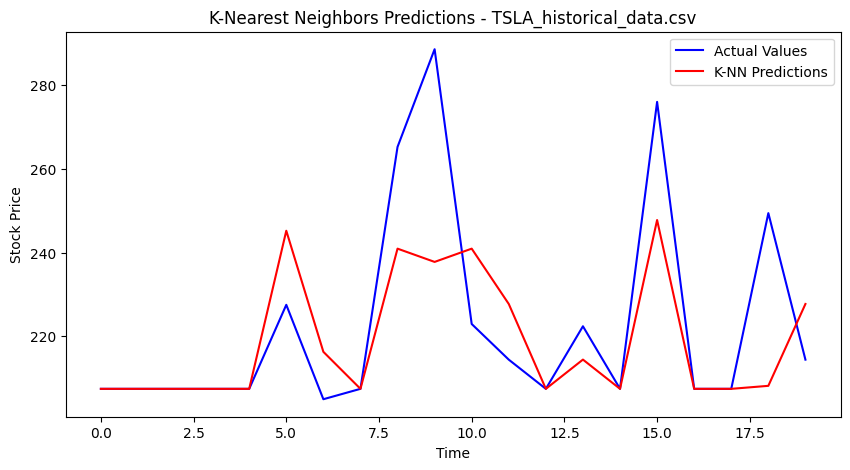

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import os
import time as t

# Set environment variable to avoid KMeans memory leak
os.environ["OMP_NUM_THREADS"] = "1"

# List of dataset names
dataset_names = [
    'TSLA_historical_data.csv'
]

# Error metrics function
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Loop through each dataset
for dataset_name in dataset_names:
    # Load the dataset
    data = pd.read_csv(dataset_name)

    # Data preprocessing
    data['t'] = pd.to_datetime(data['t'])
    data.set_index('t', inplace=True)

    # Create a complete date range
    full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
    data = data.reindex(full_range).fillna(method='ffill')  # Fill missing values if needed

    data.sort_index(inplace=True)

    y = data['c']  # Target variable
    X = data.drop(columns=['c'])  # Features

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # --- K-Nearest Neighbors ---
    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    begin=t.time()
    knn_predictions = knn_model.predict(X_test)
    end=t.time()
    times=(end-begin)*100
    print(f"The time complexity:",times)
    # Print RMSE for K-NN
    print(f"{dataset_name} - K-NN RMSE:", rmse(y_test, knn_predictions))

    # Print the first 5 actual and predicted values
    print("First 5 actual values:", y_test.head().values)
    print("First 5 predicted values:", knn_predictions[:5])

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual Values', color='blue')
    plt.plot(knn_predictions, label='K-NN Predictions', color='red')
    plt.title(f'K-Nearest Neighbors Predictions - {dataset_name}')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

In [ ]:
!pip install tensorflow

In [ ]:
!pip uninstall pyEMD

Found existing installation: pyemd 1.0.0
Uninstalling pyemd-1.0.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pyemd-1.0.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pyemd/*
Proceed (Y/n)? Y
  Successfully uninstalled pyemd-1.0.0
